In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.split_to_nix import split_currency_columns
from scripts.rename import rename_and_add_id
from scripts.convert_ds_to_date import convert_ds_to_date
from scripts.plot_time_series import plot_time_series
from scripts.aggregate_monthly_avg import aggregate_monthly_avg
from scripts.to_float import convert_y_to_float
from scripts.save_to_parquet import save_to_parquet

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/milho/milho.csv")

In [4]:
df.head(10)

,Data,À vista R$,À vista US$
0,02/08/2004,"18,24","5,98"
1,03/08/2004,"18,04","5,91"
2,04/08/2004,"18,02","5,9"
3,05/08/2004,"18,06","5,89"
4,06/08/2004,"18,13","5,98"
5,09/08/2004,"17,97","5,91"
6,10/08/2004,"17,98","5,94"
7,11/08/2004,"18,08","5,95"
8,12/08/2004,"18,07","5,95"
9,13/08/2004,"18,04","5,97"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5119 non-null   object
 1   À vista R$   5119 non-null   object
 2   À vista US$  5119 non-null   object
dtypes: object(3)
memory usage: 120.1+ KB


In [6]:
df_brl, df_usd = split_currency_columns(df)

In [7]:
df_brl.head(10)

,Data,À vista R$
0,02/08/2004,"18,24"
1,03/08/2004,"18,04"
2,04/08/2004,"18,02"
3,05/08/2004,"18,06"
4,06/08/2004,"18,13"
5,09/08/2004,"17,97"
6,10/08/2004,"17,98"
7,11/08/2004,"18,08"
8,12/08/2004,"18,07"
9,13/08/2004,"18,04"


In [8]:
df_usd.head(10)

,Data,À vista US$
0,02/08/2004,"5,98"
1,03/08/2004,"5,91"
2,04/08/2004,"5,9"
3,05/08/2004,"5,89"
4,06/08/2004,"5,98"
5,09/08/2004,"5,91"
6,10/08/2004,"5,94"
7,11/08/2004,"5,95"
8,12/08/2004,"5,95"
9,13/08/2004,"5,97"


In [9]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

cols_dict_usd = {
    'Data': 'ds',
    'À vista US$': 'y'
}

In [10]:
unique_id = 'MILHO'
df_brl = rename_and_add_id(df_brl, cols_dict_brl, unique_id)
df_usd = rename_and_add_id(df_usd, cols_dict_usd, unique_id)

In [11]:
df_brl.head(10)

,ds,y,unique_id
0,02/08/2004,"18,24",MILHO
1,03/08/2004,"18,04",MILHO
2,04/08/2004,"18,02",MILHO
3,05/08/2004,"18,06",MILHO
4,06/08/2004,"18,13",MILHO
5,09/08/2004,"17,97",MILHO
6,10/08/2004,"17,98",MILHO
7,11/08/2004,"18,08",MILHO
8,12/08/2004,"18,07",MILHO
9,13/08/2004,"18,04",MILHO


In [12]:
df_usd.head(10)

,ds,y,unique_id
0,02/08/2004,"5,98",MILHO
1,03/08/2004,"5,91",MILHO
2,04/08/2004,"5,9",MILHO
3,05/08/2004,"5,89",MILHO
4,06/08/2004,"5,98",MILHO
5,09/08/2004,"5,91",MILHO
6,10/08/2004,"5,94",MILHO
7,11/08/2004,"5,95",MILHO
8,12/08/2004,"5,95",MILHO
9,13/08/2004,"5,97",MILHO


In [13]:
df_brl = convert_ds_to_date(df_brl)
df_usd = convert_ds_to_date(df_usd)

df_brl = convert_y_to_float(df_brl)
df_usd = convert_y_to_float(df_usd)

In [14]:
df_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         5119 non-null   datetime64[ns]
 1   y          5119 non-null   float64       
 2   unique_id  5119 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 120.1+ KB


In [15]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         5119 non-null   datetime64[ns]
 1   y          5119 non-null   float64       
 2   unique_id  5119 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 120.1+ KB


In [16]:
df_brl = aggregate_monthly_avg(df_brl)
df_usd = aggregate_monthly_avg(df_usd)

In [17]:
df_brl.head(10)

,ds,y,unique_id
0,2004-08-01,18.367273,MILHO
1,2004-09-01,19.049000,MILHO
2,2004-10-01,18.266000,MILHO
3,2004-11-01,17.701500,MILHO
4,2004-12-01,17.144286,MILHO
5,2005-01-01,17.816190,MILHO
6,2005-02-01,17.473333,MILHO
7,2005-03-01,20.056818,MILHO
8,2005-04-01,19.347000,MILHO
9,2005-05-01,19.024286,MILHO


In [18]:
df_usd.head(10)

,ds,y,unique_id
0,2004-08-01,6.123636,MILHO
1,2004-09-01,6.589000,MILHO
2,2004-10-01,6.400500,MILHO
3,2004-11-01,6.351500,MILHO
4,2004-12-01,6.297619,MILHO
5,2005-01-01,6.617143,MILHO
6,2005-02-01,6.720556,MILHO
7,2005-03-01,7.412273,MILHO
8,2005-04-01,7.503000,MILHO
9,2005-05-01,7.765714,MILHO


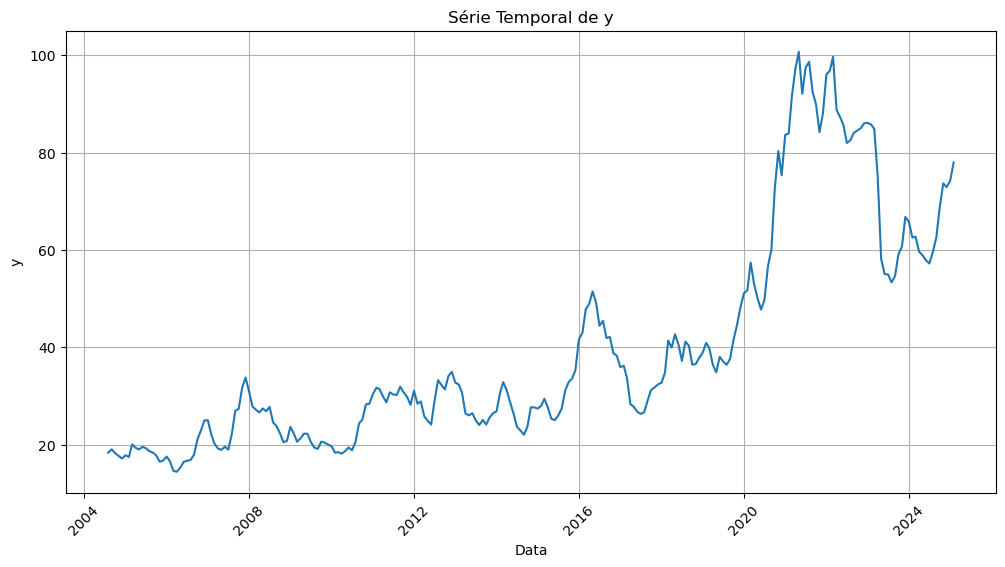

In [19]:
plot_time_series(df_brl, 'y')

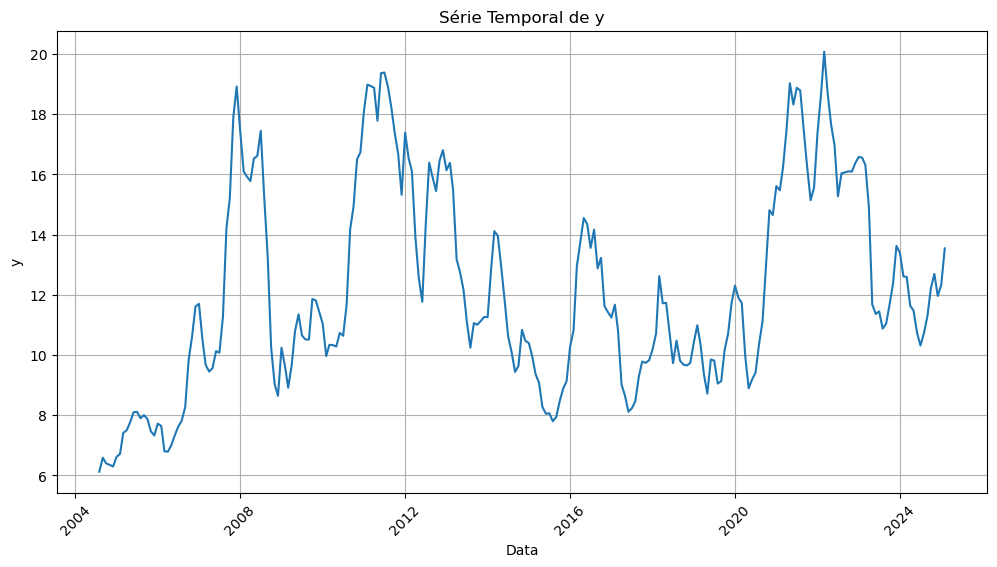

In [20]:
plot_time_series(df_usd, 'y')

In [21]:
save_to_parquet(df_brl, "../data/milho/milho_brl.parquet")
save_to_parquet(df_usd, "../data/milho/milho_usd.parquet")

Arquivo salvo em: ../data/milho/milho_brl.parquet
Arquivo salvo em: ../data/milho/milho_usd.parquet
